# Ceneo Analyzer


## imports

In [39]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## list all codes of products for wihich opinions have benn collected


In [40]:
print(*[filename.split('.')[0] for filename in os.listdir('opinions')],sep='\n')


108290707



## get a code of product about which oppinions are to analyze

In [41]:
product_id = input("Enter product id: ")

##  Reading the opinions from JSON file to pandas.DataFrame

In [42]:
MAX_SCORE = 5
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.stars = opinions.stars.apply(lambda s: round(s*MAX_SCORE,1))


## Basic statistics

In [43]:
opinions_count = len(opinions)
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_scorer = (opinions.stars.mean()).round(3)
average_scorer

4.196

## Basic charts

### Opinions score histogram

In [58]:
score_distribution = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5))
fig, ax = plt.subplots()
score_distribution.plot.bar(color='lightskyblue')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l: int(l) if l > 0 else '')
ax.set_xlabel('Number of stars')
ax.set_ylabel('Number of opinions')
ax.set_title(f'Opinion score histogram for {product_id}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


## Opionions recomendation share


Text(0.5, 1.0, 'Recomendation share for product 108290707')

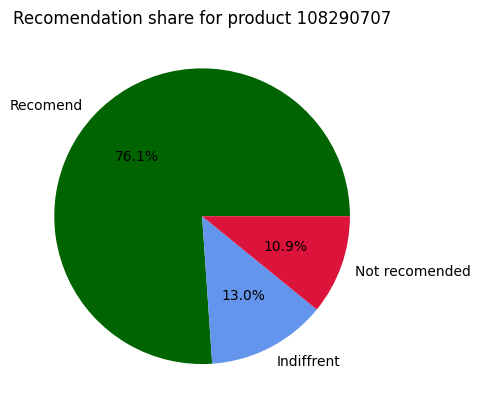

In [73]:
recomendation_distribution = opinions.recomendation.value_counts(dropna=False).reindex([1,np.nan,0])
fig, ax = plt.subplots()
recomendation_distribution.plot.pie(
    autopct = '%1.1f%%',
    labels = ['Recomend','Indiffrent','Not recomended'],
    colors = ['darkgreen','cornflowerblue','crimson'],
    label = ''
)
ax.set_title(f'Recomendation share for product {product_id}')

